In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt


In [2]:
tf.__version__

'2.4.1'

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
#X_train_scaled= X_train/255.0, Y_train_scaled= Y_train/9
#X_train_scaled, Y_train_scaled

In [6]:
print(f"Training sample :\n{train_data[0]}\n")
print(f"Training label :\n{train_labels[0]}\n")

Training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

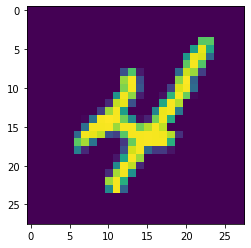

In [6]:
plt.imshow(train_data[9]);

In [7]:
train_labels[7]

3

In [8]:
class_names= [0,1,2,3,4,5,6,7,8,9]

In [9]:
len(class_names)

10

Text(0.5, 1.0, '1')

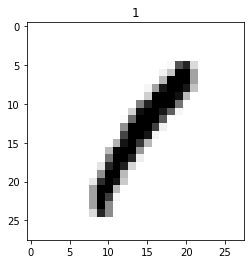

In [10]:
index_of_choice = 508
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

#plot multiple random images of  Mnist

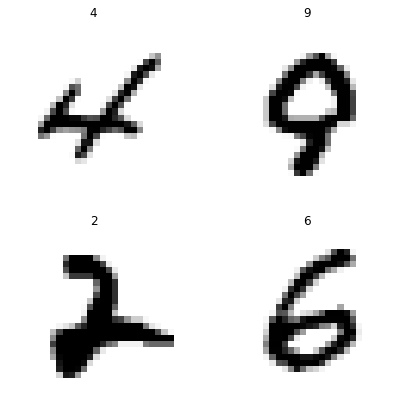

In [11]:
import random
plt.figure(figsize=(7,7))
for i in range (4):
    ax = plt.subplot(2,2,i+1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [12]:
train_data[0].shape

(28, 28)

In [16]:
train_data.max(), test_data.max()

(255, 255)

In [17]:
train_data_norm= train_data/255.0
test_data_norm= test_data/255.0

In [39]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(25, activation= "relu"),
    tf.keras.layers.Dense(25, activation= "relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

In [40]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer= tf.keras.optimizers.Adam(lr=0.01),
             metrics=["accuracy"])

In [43]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epochs/20))
early_stopping = tf.keras.callbacks.EarlyStopping()

In [44]:
norm_history= model.fit(train_data_norm,train_labels, 
          epochs=40,
           callbacks = [early_stopping],             
          validation_data= (test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9695 - val_loss: 0.2290 - val_accuracy: 0.9545
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1181 - accuracy: 0.9701 - val_loss: 0.2477 - val_accuracy: 0.9566
